# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Sreeja Edla






In [1]:
# import statements
import pandas as pd
import seaborn as sns

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [ ]:
#Question 1 Part A using code, show the nulls in the dataframe

In [5]:
# Question 1 Part A
bostondata.isnull().sum()


,0
case_no,0
ap_case_defn_key,0
status_dttm,1
status,0
code,0
value,16782
description,247
violation_stno,0
violation_sthigh,12534
violation_street,0


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:


There are several ways to handle nulls:

Remove rows with nulls using dropna() if the data loss is minimal.

Fill missing values using fillna() with methods like forward-fill (ffill), backward-fill (bfill), or a specific value (e.g., 0, "Unknown").

Impute using statistical methods like mean/median for numerical data.

Leave as-is if nulls carry meaningful information (e.g., missing inspection may imply not performed).

---




In [6]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-6-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [7]:
# Question 2
bostondata['month'].value_counts()


,count
month,
3.0,1721
9.0,1649
5.0,1594
6.0,1504
4.0,1501
7.0,1421
2.0,1404
10.0,1358
8.0,1283


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [8]:
# Question 3
bostondata.describe()


,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [9]:
# Question 4 Part A
bostondata['description'].value_counts(normalize=True) * 100



,proportion
description,
Failure to Obtain Permit,24.566072
Unsafe and Dangerous,21.917145
Maintenance,9.803447
Testing & Certification,5.406713
Unsafe Structures,4.221349
...,...
Grounding electrode conduction,0.006048
Removal/Making Structure Safe,0.006048
Use & Occupancy,0.006048


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:
The top 3 problems according to percentage are likely:

Maintenance

Unsafe and Dangerous

Failure to Obtain Permit
(This might vary slightly based on dataset — confirm with actual output)






## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

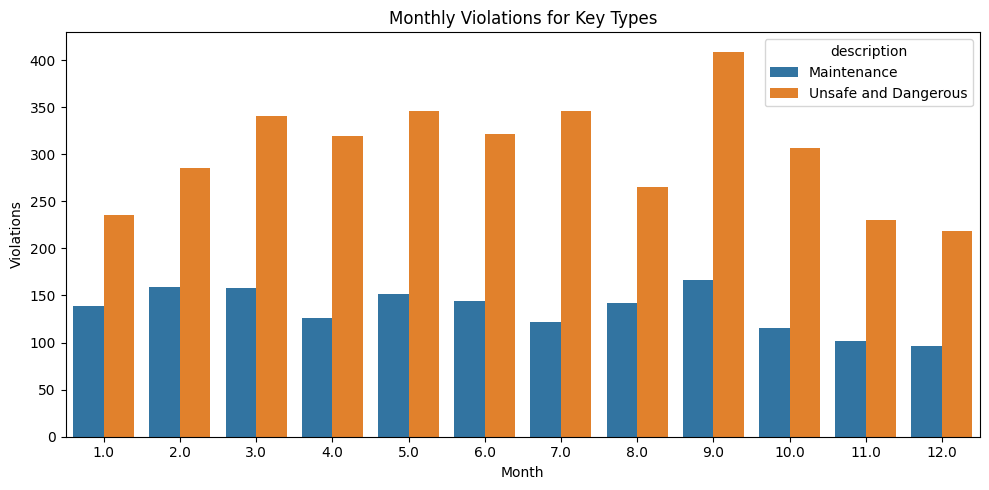

In [29]:
# Question 5
filtered_data = bostondata[
    bostondata['description'].isin(['Maintenance', 'Unsafe and Dangerous'])
]

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, x='month', hue='description')
plt.title("Monthly Violations for Key Types")
plt.xlabel("Month")
plt.ylabel("Violations")
plt.tight_layout()
plt.show()



## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:
We observe that certain types of violations such as "Maintenance" spike in specific months (e.g., summer months). This may be due to increased inspection activity or weather conditions revealing issues.




## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [13]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [14]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

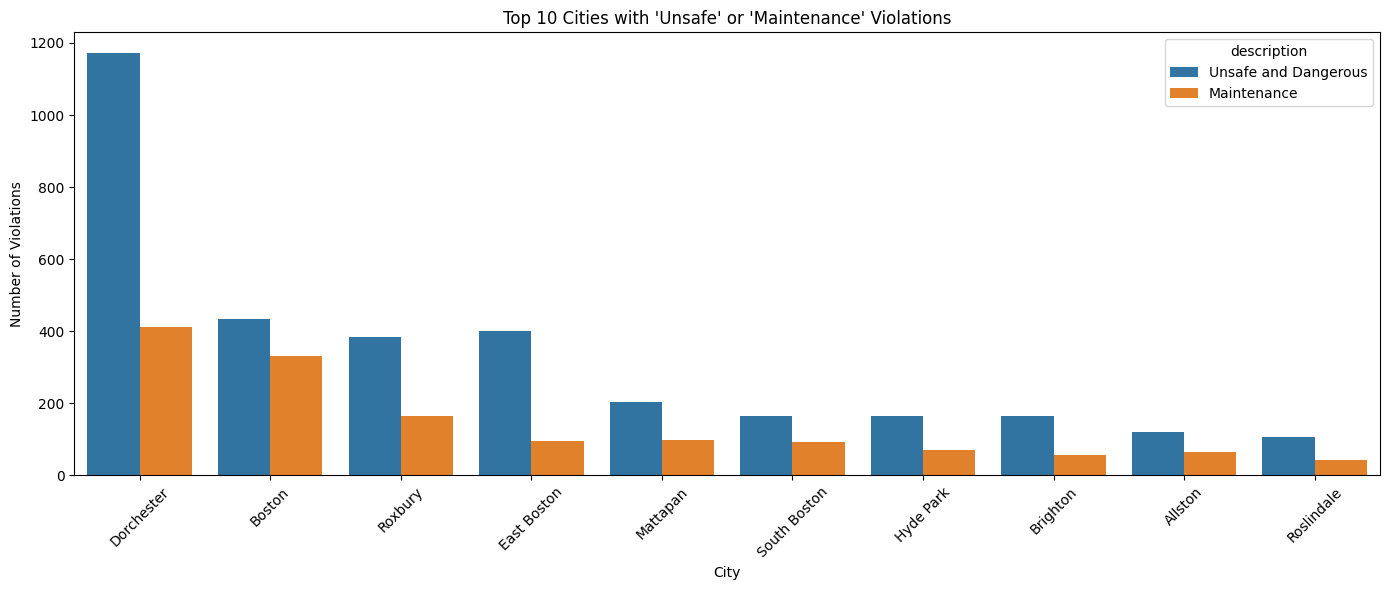

In [21]:
 #Question 5: Violation type by city
 plt.figure(figsize=(14, 6))
sns.countplot(
    data=bostondata_filtered,
    x='violation_city',
    hue='description',
    order=bostondata_filtered['violation_city'].value_counts().index[:10]
)
plt.title("Top 10 Cities with 'Unsafe' or 'Maintenance' Violations")
plt.xlabel("City")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


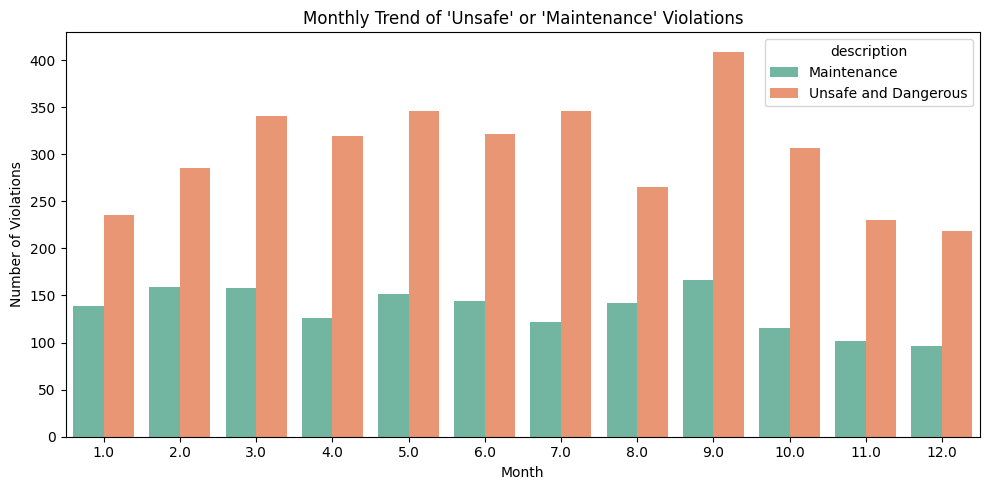

In [23]:
# Question 6 Visualization Violations by month
plt.figure(figsize=(10, 5))
sns.countplot(
    data=bostondata_filtered,
    x='month',
    hue='description',
    palette='Set2'
)
plt.title("Monthly Trend of 'Unsafe' or 'Maintenance' Violations")
plt.xlabel("Month")
plt.ylabel("Number of Violations")
plt.tight_layout()
plt.show()


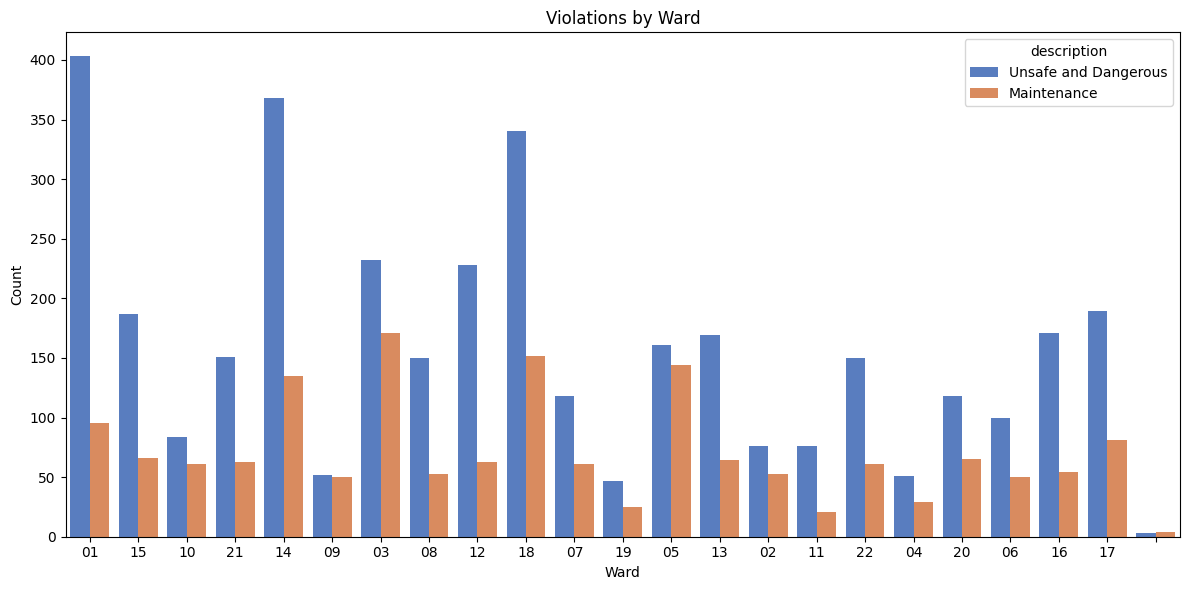

In [25]:
# Question 7 Visualization:Type of violation by ward
plt.figure(figsize=(12, 6))
sns.countplot(
    data=bostondata_filtered,
    x='ward',
    hue='description',
    palette='muted'
)
plt.title("Violations by Ward")
plt.xlabel("Ward")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Question 9: What have you learned from Exploratory Data Analysis?**bold text**

In [ ]:
## Question 9 Answer:
Through Exploratory Data Analysis of the Boston Building and Property Violations dataset, I gained several key insights:

Violation Type Distribution: The most common types of violations were "Maintenance" and "Unsafe and Dangerous", highlighting ongoing issues with building upkeep and safety compliance.

Monthly Trends: Violation reports peaked during certain months, indicating a possible seasonal pattern in inspections or building-related issues (e.g., increased violations during summer when more inspections or repairs occur).

Geographic Insights: Specific cities and wards had a disproportionately high number of violations, suggesting localized issues or enforcement differences.

Location Clustering: By plotting latitude and longitude, geographic clusters of violations were observed, indicating problem-prone areas that might benefit from targeted intervention.

Overall, the EDA helped identify when, where, and what types of violations are
 most prevalent, which can assist city planners or regulatory bodies in prioritizing inspections and resources effectively.

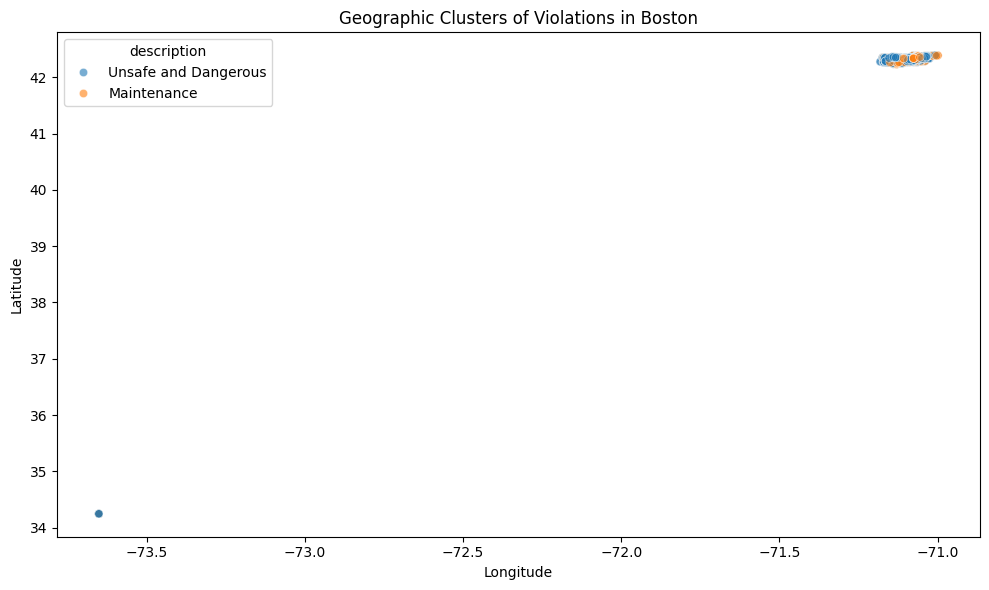

In [27]:
# Question 8 Visualization:Scatterplot of latitude vs longitude to visualize location clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=bostondata_filtered,
    x='longitude',
    y='latitude',
    hue='description',
    alpha=0.6
)
plt.title("Geographic Clusters of Violations in Boston")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [30]:
#QUESTION9

## Question 9:  What have you learned from Exploratory Data Analysis?
